In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Reading the dataset and running EAD
bike = pd.read_csv('day.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
bike.shape

(730, 16)

In [4]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
bike.size #describes the total size of the dataset

11680

In [7]:
#converting seasons values from 1,2,3,4 to spring,summer,fall & winter
def ass_seasons(x):
    if x==1:
        return 'spring'
    elif x==2:
        return 'summer'
    elif x==3:
        return 'fall'
    else:
        return 'winter'
    
    
# contverting values of months from 1-12 to Jan-Dec
def ass_mnth(x):
    return x.map({1:'jan', 2:'feb', 3:'mar', 4:'apr', 5:'may', 6:'jun', 7:'jul', 8:'aug', 9:'sep', 10:'oct', 11:'nov', 12:'dec'})



# converting day of the week from 0-6 to Sun-Sat
def ass_weekdays(x):
    return x.map({0:'sun', 1:'mon', 2:'tues',3:'wed', 4:'thurs', 5:'fri', 6:'sat'})



#convereting the weather varible as 1,2,3,4 to clear, mist , snow & rainy.
def ass_weather(x):
    return x.map ({1:'good', 2:'moderate', 3:'bad', 4:'severe'})


In [8]:
bike['season'] = bike['season'].apply(ass_seasons)

In [9]:
bike[['mnth']] = bike[['mnth']].apply(ass_mnth)

In [10]:
bike[['weekday']] = bike[['weekday']].apply(ass_weekdays)

In [11]:
bike[['weathersit']] = bike[['weathersit']].apply(ass_weather)

In [12]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,jan,0,tues,1,good,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,82,1518,1600


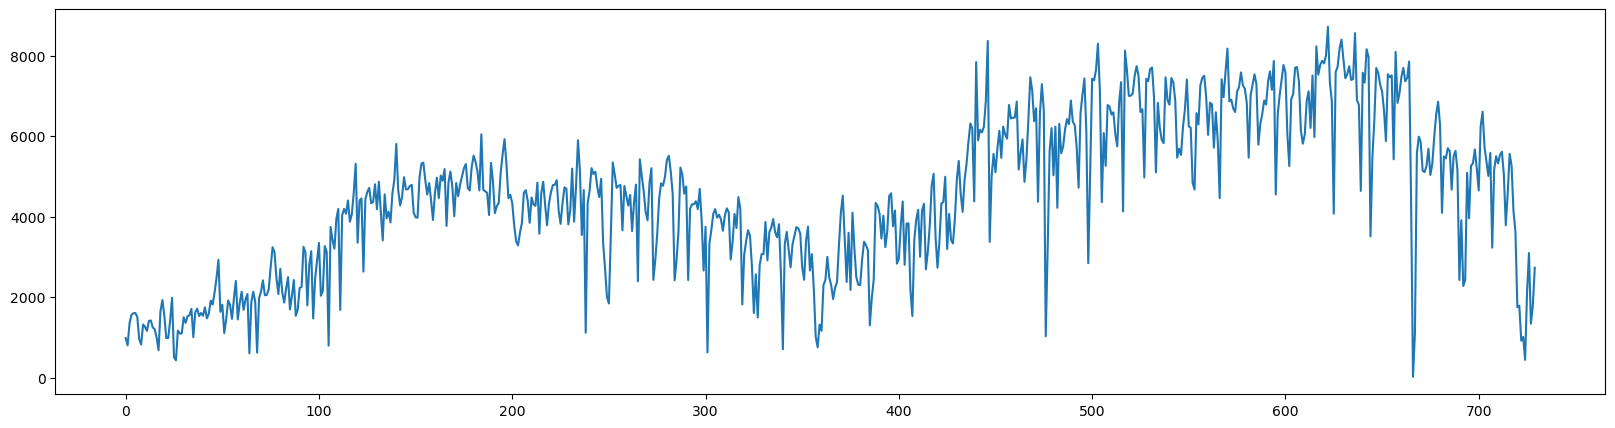

In [13]:
# trend of demand (target variable - 'cnt') over period of two years
plt.figure(figsize=(20,5))
plt.plot(bike.cnt)
plt.show()

<Figure size 1500x3000 with 0 Axes>

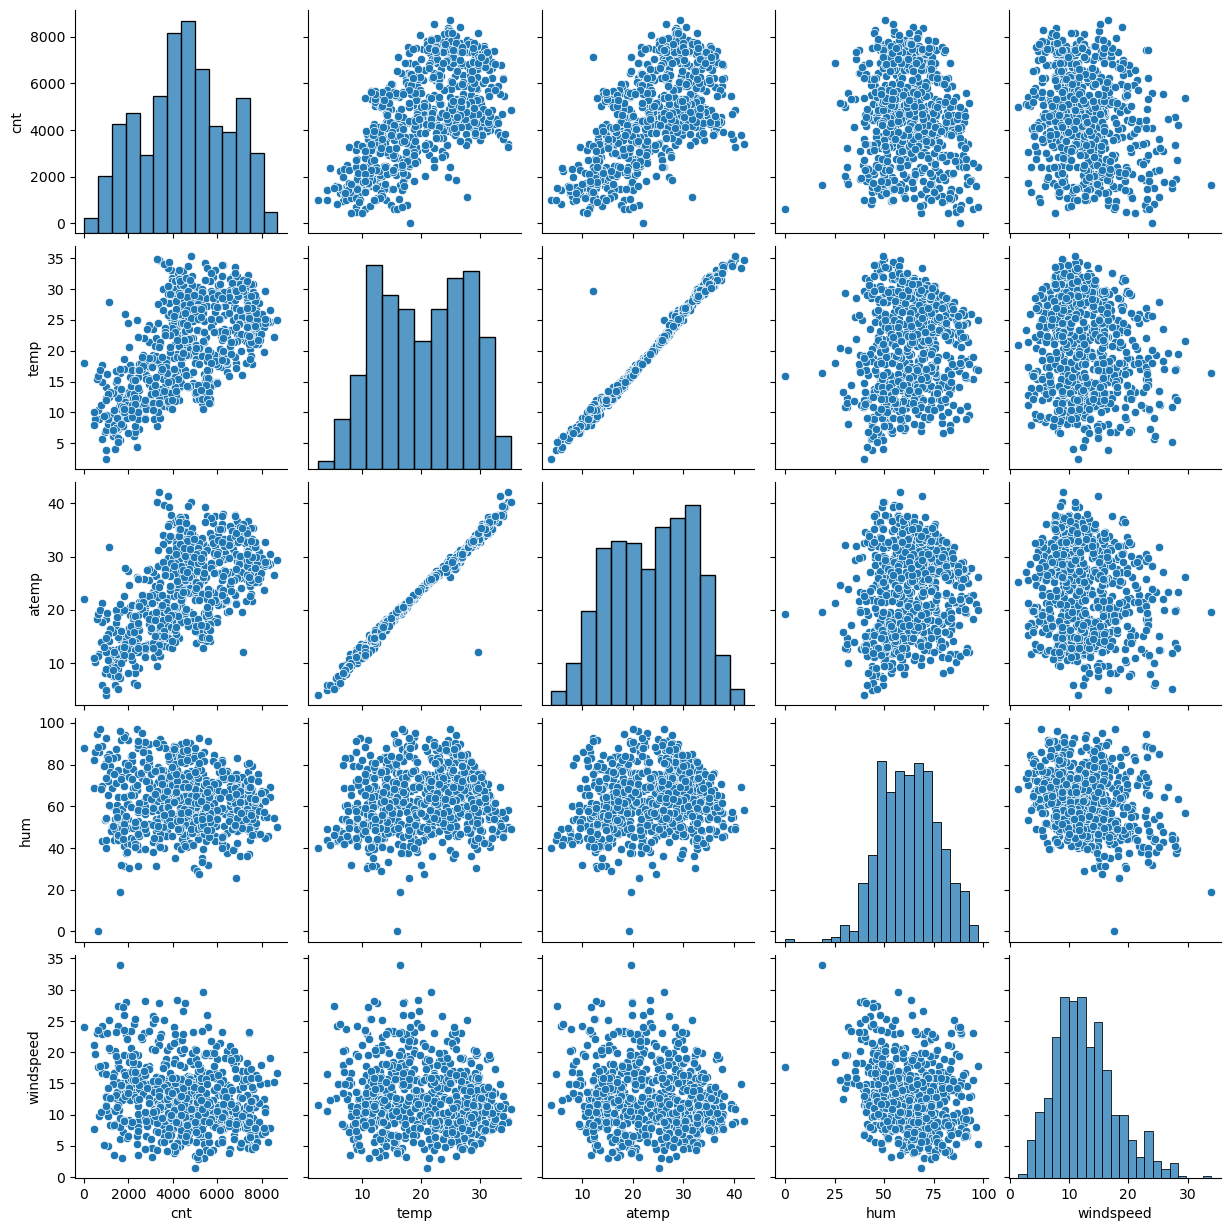

In [14]:
# Numeric Data Visualisation pairplot
plt.figure(figsize = (15,30))
sns.pairplot(data=bike,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

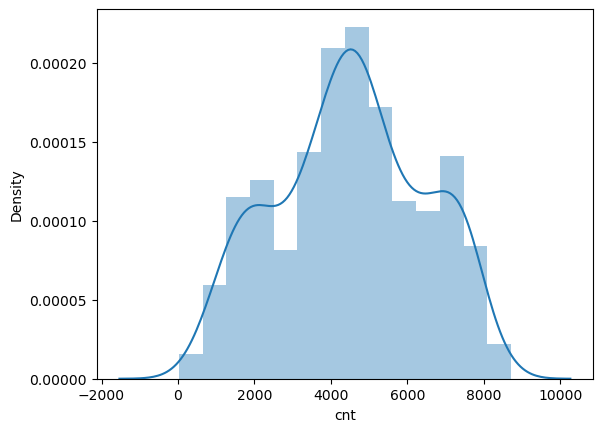

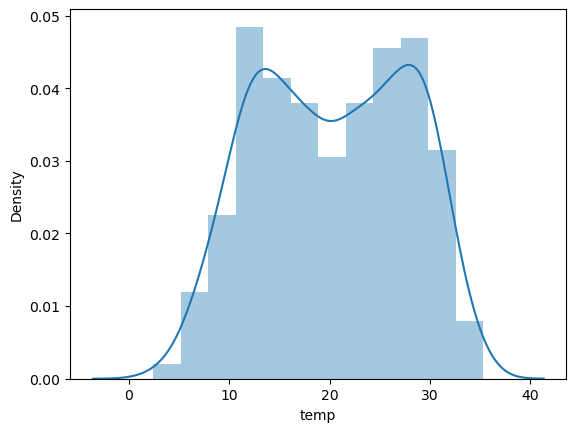

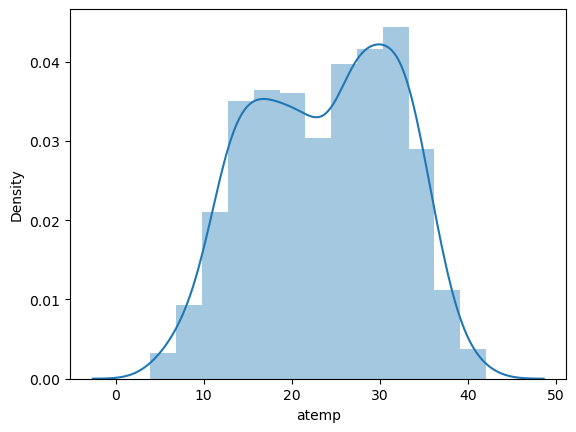

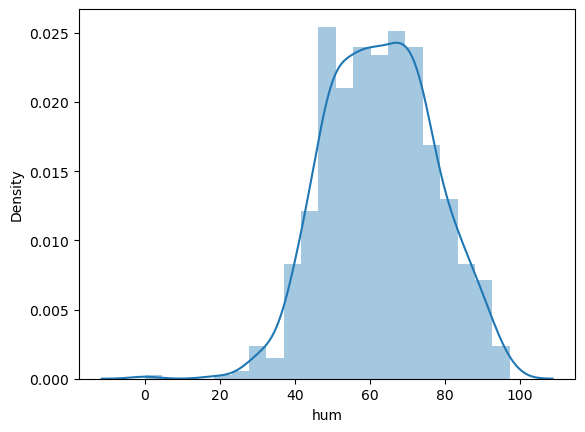

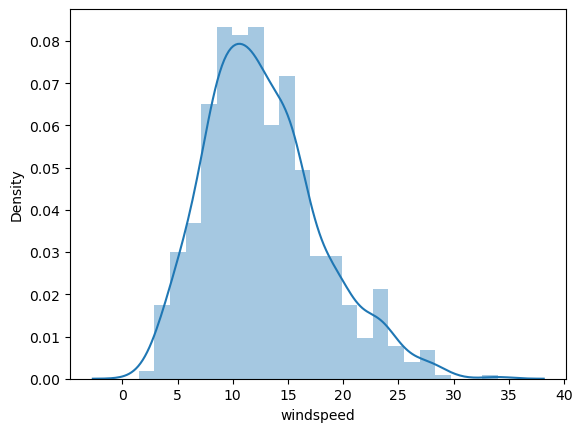

In [15]:
# Numeric Data Visualisation distplot
num_df=['cnt', 'temp', 'atemp', 'hum','windspeed']
for i in num_df:
    sns.distplot(bike[i])
    plt.show()

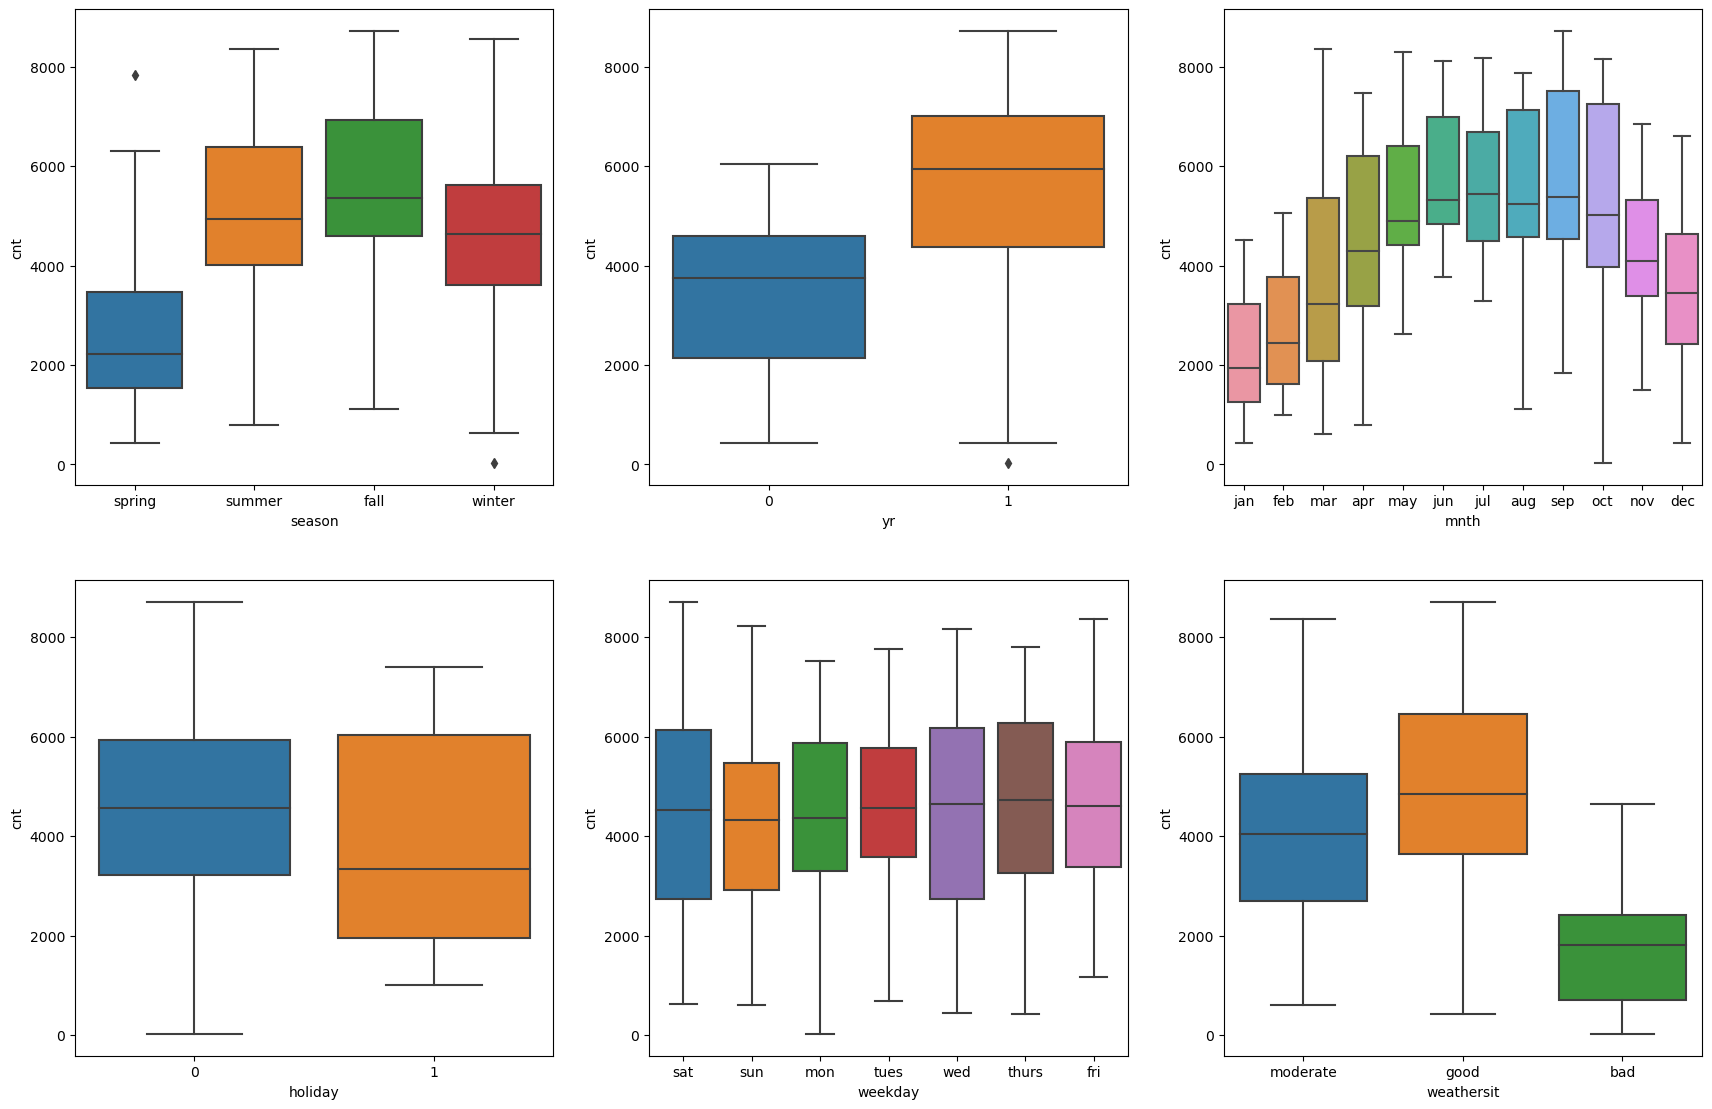

In [16]:
#visualizing categorical variables VS cnt using boxplots

plt.figure(figsize=(21,21))
plt.subplot(331)
sns.boxplot(x='season', y='cnt',data=bike)

plt.subplot(332)
sns.boxplot(x='yr', y='cnt',data=bike)

plt.subplot(333)
sns.boxplot(x='mnth', y='cnt',data=bike)

plt.subplot(334)
sns.boxplot(x='holiday', y='cnt',data=bike)

plt.subplot(335)
sns.boxplot(x='weekday', y='cnt',data=bike)

plt.subplot(336)
sns.boxplot(x='weathersit', y='cnt',data=bike)

plt.show()

In [17]:
# Droping instant column as it is index column which has nothing to do with target
bike.drop(['instant'], axis = 1, inplace = True)

# Dropping dteday as we have already have month and weekday columns to work with
bike.drop(['dteday'], axis = 1, inplace = True)

# Dropping casual and registered columnsa as as we have cnt column which is sum of the both that is the target column

bike.drop(['casual'], axis = 1, inplace = True)
bike.drop(['registered'], axis = 1, inplace = True)

bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [18]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tues,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,1600


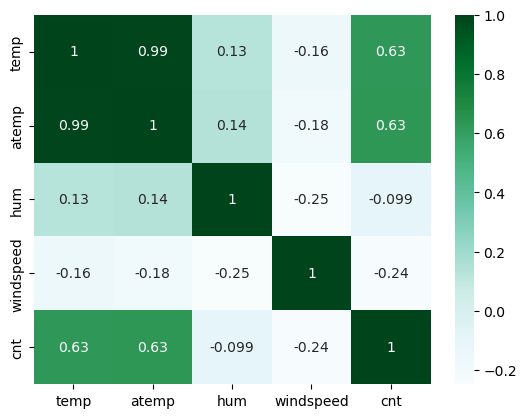

In [19]:
# Checking continuous variables relationship with each other through heatmap
sns.heatmap(bike[['temp','atemp','hum','windspeed','cnt']].corr(), cmap='BuGn', annot = True)
plt.show()

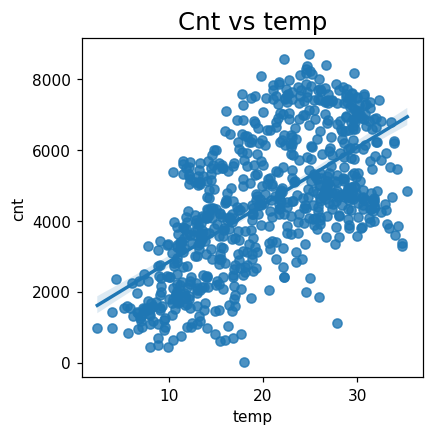

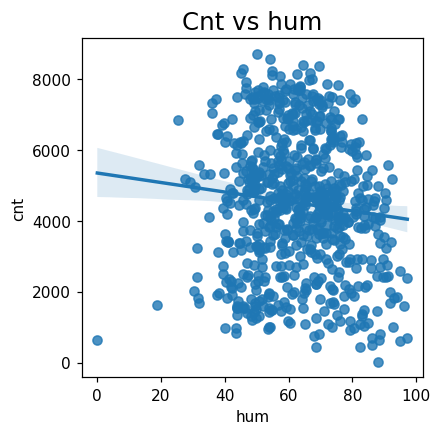

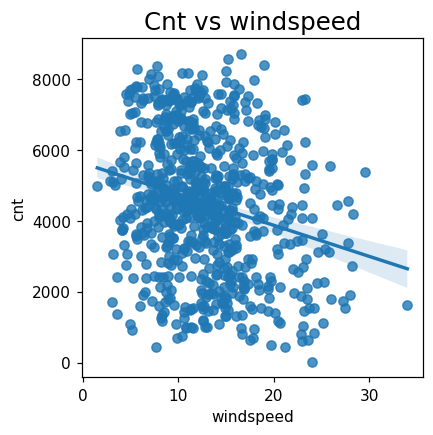

In [20]:
# Numeric Data Visualisation distplot

a_df = ['temp','hum','windspeed']

for i in a_df:
    plt.figure(figsize=(4,4),dpi=110)
    plt.title(('Cnt vs '+ i),fontsize=16)
    sns.regplot(data=bike,y="cnt",x=i)
    plt.xlabel(i)
    plt.show()

In [21]:
# creating dummy vars for season

Season = pd.get_dummies(bike['season'], drop_first = True)
Season = Season.astype(int)
print(Season.head())

   spring  summer  winter
0       1       0       0
1       1       0       0
2       1       0       0
3       1       0       0
4       1       0       0


In [22]:
# creating dummy vars for month

month = pd.get_dummies(bike['mnth'], drop_first = True)
month = month.astype(int)
print(month.head())

   aug  dec  feb  jan  jul  jun  mar  may  nov  oct  sep
0    0    0    0    1    0    0    0    0    0    0    0
1    0    0    0    1    0    0    0    0    0    0    0
2    0    0    0    1    0    0    0    0    0    0    0
3    0    0    0    1    0    0    0    0    0    0    0
4    0    0    0    1    0    0    0    0    0    0    0


In [23]:
# creating dummy vars for weekday

Weekday = pd.get_dummies(bike['weekday'], drop_first = True)
Weekday = Weekday.astype(int)
print(Weekday.head())

   mon  sat  sun  thurs  tues  wed
0    0    1    0      0     0    0
1    0    0    1      0     0    0
2    1    0    0      0     0    0
3    0    0    0      0     1    0
4    0    0    0      0     0    1


In [24]:
# creating dummy vars for working day

workingday = pd.get_dummies(bike['workingday'], drop_first = True)
workingday = workingday.astype(int)
print(workingday.head())

   1
0  0
1  0
2  1
3  1
4  1


In [25]:
# creating dummy vars for weathersit

weather = pd.get_dummies(bike['weathersit'], drop_first = True)
weather = weather.astype(int)
print(weather.head())

   good  moderate
0     0         1
1     0         1
2     1         0
3     1         0
4     1         0


In [26]:
# Add the results to the original housing dataframe

bike = pd.concat([bike,weather,workingday,Weekday, month, Season], axis = 1)

In [27]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,jul,jun,mar,may,nov,oct,sep,spring,summer,winter
0,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,...,0,0,0,0,0,0,0,1,0,0
1,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,0,1,0,0
2,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,jan,0,tues,1,good,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,0,1,0,0
4,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,1,0,0


In [28]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 35 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
 12  good        730 non-null    int32  
 13  moderate    730 non-null    int32  
 14  1           730 non-null    int32  
 15  mon         730 non-null    int32  
 16  sat         730 non-null    int32  
 17  sun         730 non-null    int32  
 18  thurs       730 non-null    int32  
 19  tues        730 non-null    i

In [29]:
# Drop all columns whose dummies have been created
bike.drop(['season', 'workingday', 'weekday', 'mnth', 'weathersit'], axis = 1, inplace = True)

bike.head()

,yr,holiday,temp,atemp,hum,windspeed,cnt,good,moderate,1,...,jul,jun,mar,may,nov,oct,sep,spring,summer,winter
0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,14.902598,17.68695,69.6087,16.652113,801,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,8.050924,9.47025,43.7273,16.636703,1349,1,0,1,...,0,0,0,0,0,0,0,1,0,0
3,0,0,8.200000,10.60610,59.0435,10.739832,1562,1,0,1,...,0,0,0,0,0,0,0,1,0,0
4,0,0,9.305237,11.46350,43.6957,12.522300,1600,1,0,1,...,0,0,0,0,0,0,0,1,0,0


In [30]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   yr         730 non-null    int64  
 1   holiday    730 non-null    int64  
 2   temp       730 non-null    float64
 3   atemp      730 non-null    float64
 4   hum        730 non-null    float64
 5   windspeed  730 non-null    float64
 6   cnt        730 non-null    int64  
 7   good       730 non-null    int32  
 8   moderate   730 non-null    int32  
 9   1          730 non-null    int32  
 10  mon        730 non-null    int32  
 11  sat        730 non-null    int32  
 12  sun        730 non-null    int32  
 13  thurs      730 non-null    int32  
 14  tues       730 non-null    int32  
 15  wed        730 non-null    int32  
 16  aug        730 non-null    int32  
 17  dec        730 non-null    int32  
 18  feb        730 non-null    int32  
 19  jan        730 non-null    int32  
 20  jul       

In [31]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

df_train, df_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 100)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(219, 30)


In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['yr','temp', 'atemp','hum', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,yr,holiday,temp,atemp,hum,windspeed,cnt,good,moderate,1,...,jul,jun,mar,may,nov,oct,sep,spring,summer,winter
653,1.0,0,0.509887,0.501133,0.575354,0.300794,0.864243,1,0,1,...,0,0,0,0,0,1,0,0,0,1
576,1.0,0,0.815169,0.766351,0.725633,0.264686,0.827658,1,0,1,...,1,0,0,0,0,0,0,0,0,0
426,1.0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,1,0,...,0,0,1,0,0,0,0,1,0,0
728,1.0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,0,0,0,1,0,0
482,1.0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [33]:
#Training the model - dividing into X and Y sets
y_train = df_train.pop('cnt')
X_train = df_train

In [34]:
X_train.columns = X_train.columns.astype(str)

In [35]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Assuming X_train and y_train are defined and hold training data
# Create a linear regression model
lm = LinearRegression()

# Fit the model to the training data
lm.fit(X_train, y_train)

# Create an RFE selector object
rfe = RFE(estimator=lm, n_features_to_select=16)

# Fit the RFE selector to the training data
rfe = rfe.fit(X_train, y_train)

In [36]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 4),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('good', True, 1),
 ('moderate', True, 1),
 ('1', True, 1),
 ('mon', False, 8),
 ('sat', True, 1),
 ('sun', False, 7),
 ('thurs', False, 11),
 ('tues', False, 9),
 ('wed', False, 12),
 ('aug', False, 6),
 ('dec', False, 2),
 ('feb', False, 3),
 ('jan', True, 1),
 ('jul', True, 1),
 ('jun', False, 13),
 ('mar', False, 14),
 ('may', False, 5),
 ('nov', True, 1),
 ('oct', False, 10),
 ('sep', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [37]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'good', 'moderate', '1',
       'sat', 'jan', 'jul', 'nov', 'sep', 'spring', 'summer', 'winter'],
      dtype='object')

In [38]:
X_train.columns[~rfe.support_]

Index(['atemp', 'mon', 'sun', 'thurs', 'tues', 'wed', 'aug', 'dec', 'feb',
       'jun', 'mar', 'may', 'oct'],
      dtype='object')

In [39]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [40]:
#Model 1
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)


In [41]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [42]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     173.6
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          1.10e-190
Time:                        11:44:14   Log-Likelihood:                 520.99
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     493   BIC:                            -936.0
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0083      0.048      0.172      0.8

In [43]:
X_train_rfe.columns

Index(['const', 'yr', 'holiday', 'temp', 'hum', 'windspeed', 'good',
       'moderate', '1', 'sat', 'jan', 'jul', 'nov', 'sep', 'spring', 'summer',
       'winter'],
      dtype='object')

In [44]:
# dropping constant 
X_train_new = X_train_rfe.drop(['const'], axis=1)

In [45]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,25.65
2,temp,23.19
5,good,15.06
6,moderate,9.10
13,spring,5.78
7,1,5.43
4,windspeed,4.72
15,winter,4.43
14,summer,3.22
0,yr,2.10


In [46]:
# Dropping 'spring' since it has high VIF and high P Value
X_train_new = X_train_new.drop(['spring'], axis=1)

In [47]:
# Model 2
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_rfe).fit()

In [48]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     182.4
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          2.59e-190
Time:                        11:44:14   Log-Likelihood:                 517.37
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     494   BIC:                            -935.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0429      0.045     -0.960      0.3

In [49]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,20.22
2,temp,13.64
5,good,11.34
6,moderate,7.99
7,1,5.37
4,windspeed,4.22
14,winter,2.53
0,yr,2.08
8,sat,1.99
13,summer,1.87


In [50]:
# Dropping 'nov' since it has a high p value
X_train_new = X_train_new.drop(['nov'], axis=1)

In [51]:
#Model 3
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_rfe).fit()

#Let's see the summary of our linear model
print(lm.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     195.3
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          3.24e-191
Time:                        11:44:14   Log-Likelihood:                 516.77
No. Observations:                 510   AIC:                            -1004.
Df Residuals:                     495   BIC:                            -940.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0443      0.045     -0.991      0.3

In [52]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,20.19
2,temp,13.59
5,good,11.29
6,moderate,7.97
7,1,5.37
4,windspeed,4.21
0,yr,2.08
13,winter,2.01
8,sat,1.99
12,summer,1.87


In [53]:
# Dropping 'jan' since it has a high p value
X_train_new = X_train_new.drop(['jan'], axis=1)

In [54]:
# Model 4
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_rfe).fit()

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     208.2
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          2.77e-191
Time:                        11:44:14   Log-Likelihood:                 514.15
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     496   BIC:                            -941.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0598      0.044     -1.349      0.1

In [55]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,18.80
2,temp,10.68
5,good,10.45
6,moderate,7.64
7,1,5.35
4,windspeed,4.21
0,yr,2.07
8,sat,1.98
11,summer,1.76
12,winter,1.71


In [56]:
#dropping 'jul' since it has a high p value
X_train_new = X_train_new.drop(['jul'], axis=1)

In [57]:
#Model 5
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_rfe).fit()

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     222.6
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          4.55e-191
Time:                        11:44:14   Log-Likelihood:                 510.83
No. Observations:                 510   AIC:                            -995.7
Df Residuals:                     497   BIC:                            -940.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0645      0.045     -1.448      0.1

In [58]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,18.67
5,good,10.44
2,temp,8.45
6,moderate,7.63
7,1,5.34
4,windspeed,4.21
0,yr,2.07
8,sat,1.98
11,winter,1.66
10,summer,1.58


In [59]:
# dropping 'hum' since it has a high p value
X_train_new = X_train_new.drop(['hum'], axis=1)

In [60]:
#Model 6
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_rfe).fit()

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     232.8
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          2.92e-188
Time:                        11:44:14   Log-Likelihood:                 501.34
No. Observations:                 510   AIC:                            -978.7
Df Residuals:                     498   BIC:                            -927.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2044      0.031     -6.527      0.0

In [61]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,good,8.61
2,temp,6.86
6,1,5.10
5,moderate,5.00
3,windspeed,4.17
0,yr,2.06
7,sat,1.94
9,summer,1.57
10,winter,1.46
8,sep,1.20


In [62]:
# Dropping 'holiday' since it has a high p value
X_train_new = X_train_new.drop(['holiday'], axis=1)

In [63]:
# Model 8
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_rfe).fit()

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     254.0
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          1.47e-188
Time:                        11:44:14   Log-Likelihood:                 499.18
No. Observations:                 510   AIC:                            -976.4
Df Residuals:                     499   BIC:                            -929.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2127      0.031     -6.827      0.0

In [64]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,good,8.23
1,temp,6.86
4,moderate,4.82
5,1,4.56
2,windspeed,4.14
0,yr,2.06
6,sat,1.81
8,summer,1.57
9,winter,1.45
7,sep,1.20


In [65]:
# dropping 'good' since it has a high VIF
X_train_new = X_train_new.drop(['good'], axis=1)

In [66]:
#Model 9
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_rfe).fit()

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     210.3
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          1.01e-163
Time:                        11:44:14   Log-Likelihood:                 437.74
No. Observations:                 510   AIC:                            -855.5
Df Residuals:                     500   BIC:                            -813.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0788      0.021      3.760      0.0

In [67]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,4.76
4,1,4.02
2,windspeed,3.39
0,yr,2.01
5,sat,1.68
7,summer,1.57
3,moderate,1.50
8,winter,1.38
6,sep,1.20


In [68]:
#Conclusion of Model Building
#We can now finalise Model 9 since it shows that all variables have low VIF and low P value

In [69]:
 #Residual analysis
y_train_cnt = lm.predict(X_train_rfe)

Text(0.5, 0, 'Errors')

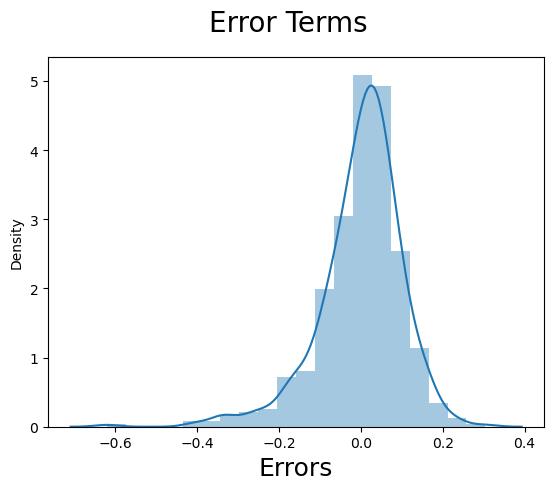

In [70]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

Text(0, 0.5, 'Residual')

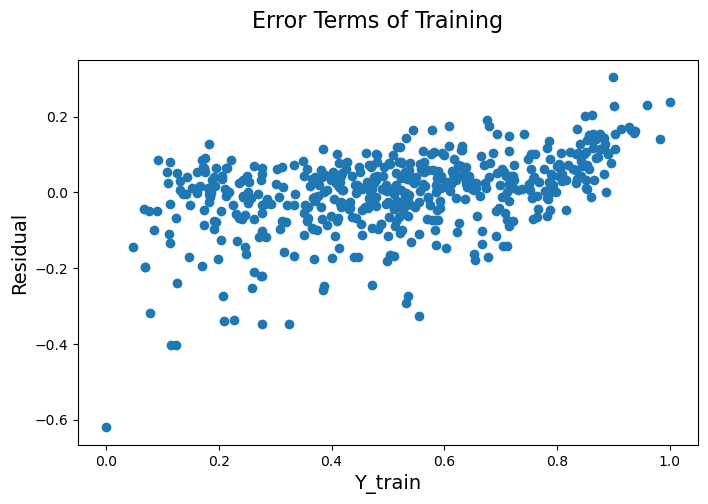

In [71]:
# Error terms
res_train = y_train - y_train_cnt
c = [i for i in range(1,len(y_train)+1,1)]
fig = plt.figure(figsize=(8,5))
plt.scatter(y_train,res_train)
fig.suptitle('Error Terms of Training', fontsize=16)              # Plot heading 
plt.xlabel('Y_train', fontsize=14)                      # X-label
plt.ylabel('Residual', fontsize=14)

In [72]:
#5: Predictions and evaluation on the test set

In [73]:
num_vars = ['yr','temp', 'atemp','hum', 'windspeed', 'cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

df_train.head()

,yr,holiday,temp,atemp,hum,windspeed,good,moderate,1,mon,...,jul,jun,mar,may,nov,oct,sep,spring,summer,winter
653,1.0,0,0.509887,0.501133,0.575354,0.300794,1,0,1,0,...,0,0,0,0,0,1,0,0,0,1
576,1.0,0,0.815169,0.766351,0.725633,0.264686,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0
426,1.0,0,0.442393,0.438975,0.640189,0.255342,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
728,1.0,0,0.245101,0.200348,0.498067,0.663106,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
482,1.0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
